# Assignment 1

### You MUST build on top of what we have coded in the class (to prevent anyone from just copying from the internet).

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

Submit as GitHub link.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
np.__version__, torch.__version__

('1.21.6', '1.13.1+cu116')

In [3]:
import matplotlib
matplotlib.__version__

'3.2.2'

## Loading Data 

In [4]:
# defining corpus

corpus = ["We don’t regularly think about the intricacies of our own languages.",
          "It’s an intuitive behavior used to convey information and meaning with semantic cues such as words, signs, or images.",
          "It’s been said that language is easier to learn and comes more naturally in adolescence because it’s a repeatable, trained behavior—much like walking.",
          "And language doesn’t follow a strict set of rules, with so many exceptions like “I before E except after C.” ",
          "What comes naturally to humans, however, is exceedingly difficult for computers with the amount of unstructured data, lack of formal rules, and absence of real-world context or intent.",
          "That’s why machine learning and artificial intelligence (AI) are gaining attention and momentum, with greater human dependency on computing systems to communicate and perform tasks.",
          "And as AI and augmented analytics get more sophisticated, so will Natural Language Processing (NLP).", 
          "While the terms AI and NLP might conjure images of futuristic robots, there are already basic examples of NLP at work in our daily lives."]

In [5]:
corpus = [sent.split(" ") for sent in corpus]
corpus

[['We',
  'don’t',
  'regularly',
  'think',
  'about',
  'the',
  'intricacies',
  'of',
  'our',
  'own',
  'languages.'],
 ['It’s',
  'an',
  'intuitive',
  'behavior',
  'used',
  'to',
  'convey',
  'information',
  'and',
  'meaning',
  'with',
  'semantic',
  'cues',
  'such',
  'as',
  'words,',
  'signs,',
  'or',
  'images.'],
 ['It’s',
  'been',
  'said',
  'that',
  'language',
  'is',
  'easier',
  'to',
  'learn',
  'and',
  'comes',
  'more',
  'naturally',
  'in',
  'adolescence',
  'because',
  'it’s',
  'a',
  'repeatable,',
  'trained',
  'behavior—much',
  'like',
  'walking.'],
 ['And',
  'language',
  'doesn’t',
  'follow',
  'a',
  'strict',
  'set',
  'of',
  'rules,',
  'with',
  'so',
  'many',
  'exceptions',
  'like',
  '“I',
  'before',
  'E',
  'except',
  'after',
  'C.”',
  ''],
 ['What',
  'comes',
  'naturally',
  'to',
  'humans,',
  'however,',
  'is',
  'exceedingly',
  'difficult',
  'for',
  'computers',
  'with',
  'the',
  'amount',
  'of',
  'u

In [6]:
# getting word sequences and unique words

flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['',
 'greater',
 'follow',
 'learn',
 'attention',
 'machine',
 'to',
 'intricacies',
 '“I',
 'meaning',
 'exceptions',
 'comes',
 'already',
 'been',
 'in',
 'set',
 'intelligence',
 'images',
 'languages.',
 'momentum,',
 'behavior—much',
 'except',
 'many',
 'for',
 'that',
 'difficult',
 'augmented',
 'get',
 'lack',
 'futuristic',
 'at',
 'will',
 'NLP',
 'used',
 'C.”',
 'think',
 'humans,',
 'doesn’t',
 'analytics',
 'of',
 'with',
 'language',
 'our',
 'like',
 'strict',
 'there',
 'rules,',
 'computing',
 'robots,',
 'And',
 'computers',
 'behavior',
 'examples',
 'perform',
 'so',
 'words,',
 'repeatable,',
 'trained',
 'artificial',
 'easier',
 'convey',
 'it’s',
 'however,',
 'more',
 'amount',
 'daily',
 'human',
 'walking.',
 'an',
 'because',
 'AI',
 'lives.',
 'before',
 '(NLP).',
 'intuitive',
 'information',
 'adolescence',
 'as',
 'While',
 'is',
 'don’t',
 'basic',
 'or',
 'tasks.',
 'naturally',
 'work',
 'formal',
 'Processing',
 'Natural',
 'conjure',
 'the',
 '

In [7]:
# numericalization

word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'': 0, 'greater': 1, 'follow': 2, 'learn': 3, 'attention': 4, 'machine': 5, 'to': 6, 'intricacies': 7, '“I': 8, 'meaning': 9, 'exceptions': 10, 'comes': 11, 'already': 12, 'been': 13, 'in': 14, 'set': 15, 'intelligence': 16, 'images': 17, 'languages.': 18, 'momentum,': 19, 'behavior—much': 20, 'except': 21, 'many': 22, 'for': 23, 'that': 24, 'difficult': 25, 'augmented': 26, 'get': 27, 'lack': 28, 'futuristic': 29, 'at': 30, 'will': 31, 'NLP': 32, 'used': 33, 'C.”': 34, 'think': 35, 'humans,': 36, 'doesn’t': 37, 'analytics': 38, 'of': 39, 'with': 40, 'language': 41, 'our': 42, 'like': 43, 'strict': 44, 'there': 45, 'rules,': 46, 'computing': 47, 'robots,': 48, 'And': 49, 'computers': 50, 'behavior': 51, 'examples': 52, 'perform': 53, 'so': 54, 'words,': 55, 'repeatable,': 56, 'trained': 57, 'artificial': 58, 'easier': 59, 'convey': 60, 'it’s': 61, 'however,': 62, 'more': 63, 'amount': 64, 'daily': 65, 'human': 66, 'walking.': 67, 'an': 68, 'because': 69, 'AI': 70, 'lives.': 71, 'befor

In [8]:
# checking vocab size

voc_size = len(vocab)
print(voc_size)

128


In [9]:
# appending UNK
vocab.append('<UNK>')

In [10]:
word2index['<UNK>'] = 128

In [11]:
# just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

## Preparing Train Data

In [12]:
for c in corpus:
    print(c)

['We', 'don’t', 'regularly', 'think', 'about', 'the', 'intricacies', 'of', 'our', 'own', 'languages.']
['It’s', 'an', 'intuitive', 'behavior', 'used', 'to', 'convey', 'information', 'and', 'meaning', 'with', 'semantic', 'cues', 'such', 'as', 'words,', 'signs,', 'or', 'images.']
['It’s', 'been', 'said', 'that', 'language', 'is', 'easier', 'to', 'learn', 'and', 'comes', 'more', 'naturally', 'in', 'adolescence', 'because', 'it’s', 'a', 'repeatable,', 'trained', 'behavior—much', 'like', 'walking.']
['And', 'language', 'doesn’t', 'follow', 'a', 'strict', 'set', 'of', 'rules,', 'with', 'so', 'many', 'exceptions', 'like', '“I', 'before', 'E', 'except', 'after', 'C.”', '']
['What', 'comes', 'naturally', 'to', 'humans,', 'however,', 'is', 'exceedingly', 'difficult', 'for', 'computers', 'with', 'the', 'amount', 'of', 'unstructured', 'data,', 'lack', 'of', 'formal', 'rules,', 'and', 'absence', 'of', 'real-world', 'context', 'or', 'intent.']
['That’s', 'why', 'machine', 'learning', 'and', 'artific

In [13]:
# word2index
skipgrams = []

# for each corpus
window_size = 2
for sent in corpus:
    for i in range(window_size, len(sent) - window_size): 
        center_word = sent[i]
        outside_words = [sent[i-2], sent[i-1], sent[i+1], sent[i+2]]  #window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams

[['regularly', 'We'],
 ['regularly', 'don’t'],
 ['regularly', 'think'],
 ['regularly', 'about'],
 ['think', 'don’t'],
 ['think', 'regularly'],
 ['think', 'about'],
 ['think', 'the'],
 ['about', 'regularly'],
 ['about', 'think'],
 ['about', 'the'],
 ['about', 'intricacies'],
 ['the', 'think'],
 ['the', 'about'],
 ['the', 'intricacies'],
 ['the', 'of'],
 ['intricacies', 'about'],
 ['intricacies', 'the'],
 ['intricacies', 'of'],
 ['intricacies', 'our'],
 ['of', 'the'],
 ['of', 'intricacies'],
 ['of', 'our'],
 ['of', 'own'],
 ['our', 'intricacies'],
 ['our', 'of'],
 ['our', 'own'],
 ['our', 'languages.'],
 ['intuitive', 'It’s'],
 ['intuitive', 'an'],
 ['intuitive', 'behavior'],
 ['intuitive', 'used'],
 ['behavior', 'an'],
 ['behavior', 'intuitive'],
 ['behavior', 'used'],
 ['behavior', 'to'],
 ['used', 'intuitive'],
 ['used', 'behavior'],
 ['used', 'to'],
 ['used', 'convey'],
 ['to', 'behavior'],
 ['to', 'used'],
 ['to', 'convey'],
 ['to', 'information'],
 ['convey', 'used'],
 ['convey', '

In [14]:
def random_batch(batch_size, word_sequence):
    
    # making skip gram of window size 2
    skip_grams = []
    
    # looping each word sequence
    for sent in corpus:
        for i in range(window_size, len(sent) - window_size):
            target = word2index[sent[i]]
            context = [word2index[sent[i - 2]], word2index[sent[i - 1]], word2index[sent[i + 1]], word2index[sent[i + 2]]] # window size 2
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

## Testing the Method

In [15]:
# testing the method

batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch(batch_size, corpus)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[39]
 [20]]
Target:  [[32]
 [57]]


## Modeling

In [16]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(vocab_size, emb_size)  # it is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, outside_words, all_vocabs):
        center_word_embed = self.embedding_center_word(center_words)     # (batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_words)   # (batch_size, 1, emb_size)
        all_vocabs_embed = self.embedding_outside_word(all_vocabs)     # (batch_size, voc_size, emb_size)
        # print(all_embeds.shape)
        
        # bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        # (batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  # exp(uo vc)
        # (batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         # (batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) # sum exp(uw vc)
        # (batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        # (batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

## Training

In [17]:
batch_size = 2 # mini-batch size
embedding_size = 2 # so that we can later plot
model = Skipgram(len(vocab), embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
model

Skipgram(
  (embedding_center_word): Embedding(129, 2)
  (embedding_outside_word): Embedding(129, 2)
)

In [19]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

# using for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 129])

In [20]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [21]:
import time

init_time = time.time()

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    input_batch  = torch.LongTensor(input_batch)  
    target_batch = torch.LongTensor(target_batch) 
    # print(input_batch.shape)
    # print(target_batch.shape)

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

total_time = time.time() - init_time
print('Total time:', total_time)

Epoch: 1000 | cost: 4.595192 | time: 0m 0s
Epoch: 2000 | cost: 6.984469 | time: 0m 0s
Epoch: 3000 | cost: 5.425393 | time: 0m 0s
Epoch: 4000 | cost: 4.631976 | time: 0m 0s
Epoch: 5000 | cost: 5.213828 | time: 0m 0s
Epoch: 6000 | cost: 4.564885 | time: 0m 0s
Epoch: 7000 | cost: 4.795971 | time: 0m 0s
Epoch: 8000 | cost: 4.682007 | time: 0m 0s
Epoch: 9000 | cost: 4.253572 | time: 0m 0s
Epoch: 10000 | cost: 5.248953 | time: 0m 0s
Total time: 10.296732664108276


So, the total time required for Skipgram is around 10.3 seconds.

## Plotting the Embeddings

In [22]:
vocab

['',
 'greater',
 'follow',
 'learn',
 'attention',
 'machine',
 'to',
 'intricacies',
 '“I',
 'meaning',
 'exceptions',
 'comes',
 'already',
 'been',
 'in',
 'set',
 'intelligence',
 'images',
 'languages.',
 'momentum,',
 'behavior—much',
 'except',
 'many',
 'for',
 'that',
 'difficult',
 'augmented',
 'get',
 'lack',
 'futuristic',
 'at',
 'will',
 'NLP',
 'used',
 'C.”',
 'think',
 'humans,',
 'doesn’t',
 'analytics',
 'of',
 'with',
 'language',
 'our',
 'like',
 'strict',
 'there',
 'rules,',
 'computing',
 'robots,',
 'And',
 'computers',
 'behavior',
 'examples',
 'perform',
 'so',
 'words,',
 'repeatable,',
 'trained',
 'artificial',
 'easier',
 'convey',
 'it’s',
 'however,',
 'more',
 'amount',
 'daily',
 'human',
 'walking.',
 'an',
 'because',
 'AI',
 'lives.',
 'before',
 '(NLP).',
 'intuitive',
 'information',
 'adolescence',
 'as',
 'While',
 'is',
 'don’t',
 'basic',
 'or',
 'tasks.',
 'naturally',
 'work',
 'formal',
 'Processing',
 'Natural',
 'conjure',
 'the',
 '

In [23]:
semantic = torch.LongTensor([word2index['semantic']])
semantic

tensor([108])

In [24]:
semantic_center_embed = model.embedding_center_word(semantic)
semantic_outisde_embed = model.embedding_outside_word(semantic)

semantic_embed = (semantic_center_embed + semantic_outisde_embed) / 2
semantic_embed

tensor([[-0.2274, -0.2632]], grad_fn=<DivBackward0>)

In [25]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [26]:
# finding embedding of humans, images

print(get_embed('humans'))
print(get_embed('images'))

(0.3606494069099426, -0.31101587414741516)
(-0.4918568432331085, -0.41044366359710693)


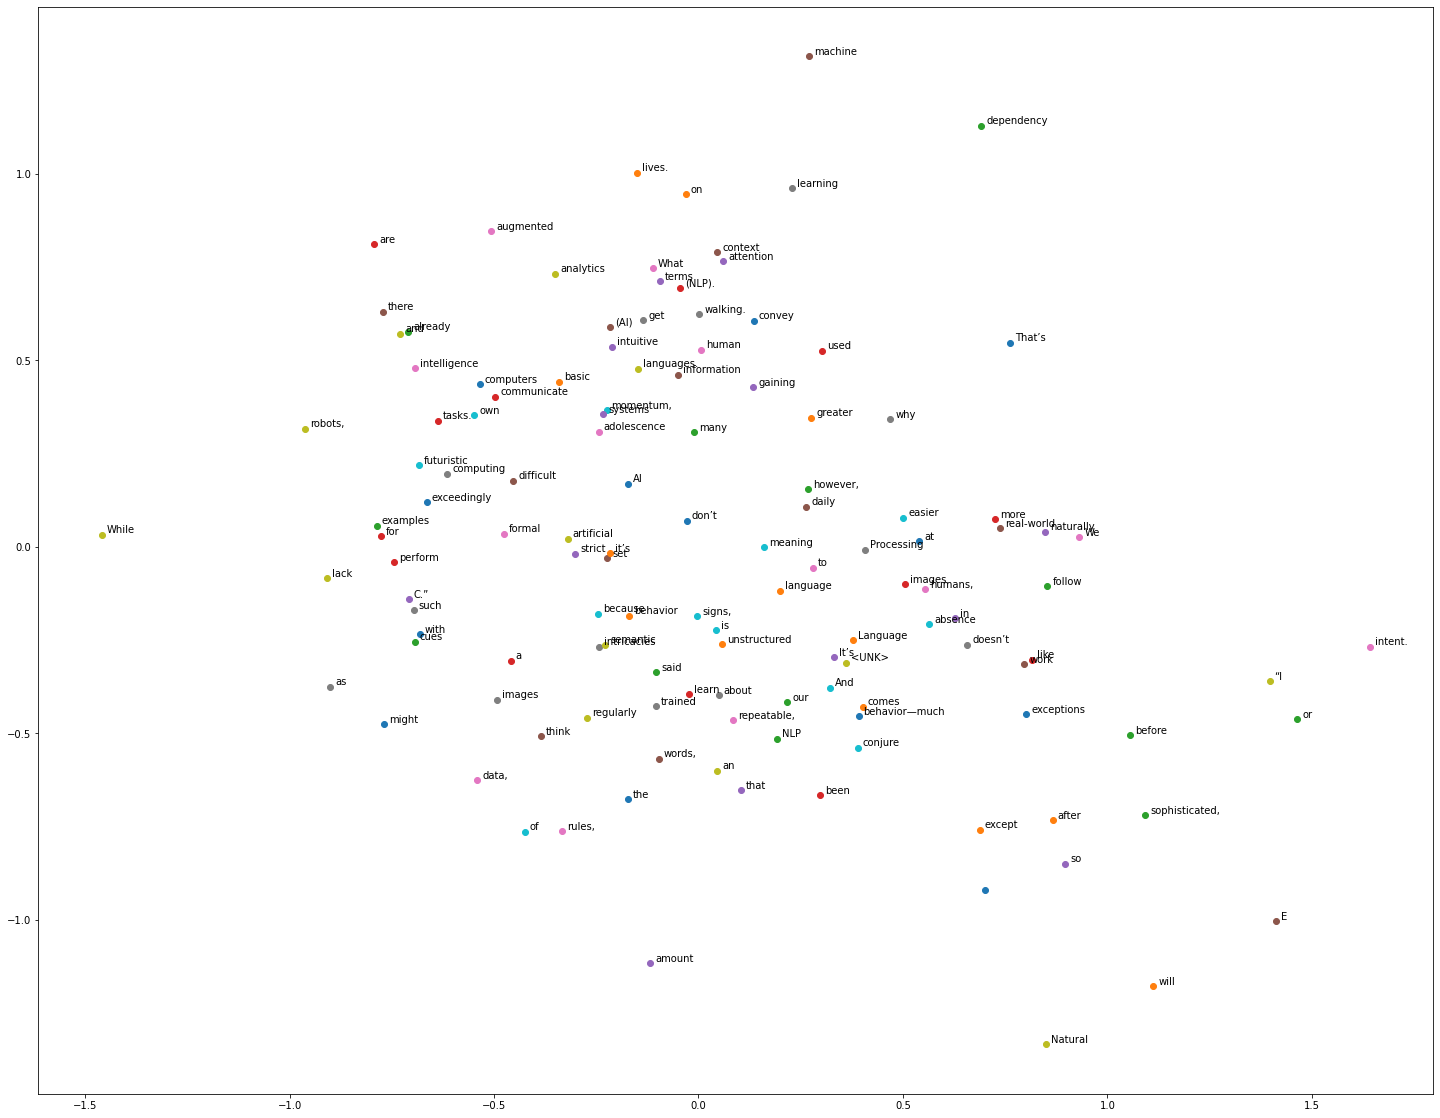

In [27]:
# plotting the words 

plt.figure(figsize=(25,20))
for i, word in enumerate(vocab): # looping each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

# Continuous Bag-of-Words (CBOW)

In [28]:
vocab

['',
 'greater',
 'follow',
 'learn',
 'attention',
 'machine',
 'to',
 'intricacies',
 '“I',
 'meaning',
 'exceptions',
 'comes',
 'already',
 'been',
 'in',
 'set',
 'intelligence',
 'images',
 'languages.',
 'momentum,',
 'behavior—much',
 'except',
 'many',
 'for',
 'that',
 'difficult',
 'augmented',
 'get',
 'lack',
 'futuristic',
 'at',
 'will',
 'NLP',
 'used',
 'C.”',
 'think',
 'humans,',
 'doesn’t',
 'analytics',
 'of',
 'with',
 'language',
 'our',
 'like',
 'strict',
 'there',
 'rules,',
 'computing',
 'robots,',
 'And',
 'computers',
 'behavior',
 'examples',
 'perform',
 'so',
 'words,',
 'repeatable,',
 'trained',
 'artificial',
 'easier',
 'convey',
 'it’s',
 'however,',
 'more',
 'amount',
 'daily',
 'human',
 'walking.',
 'an',
 'because',
 'AI',
 'lives.',
 'before',
 '(NLP).',
 'intuitive',
 'information',
 'adolescence',
 'as',
 'While',
 'is',
 'don’t',
 'basic',
 'or',
 'tasks.',
 'naturally',
 'work',
 'formal',
 'Processing',
 'Natural',
 'conjure',
 'the',
 '

In [29]:
# vocab size

voc_size = len(vocab)
print(voc_size)

129


## Preparing Train Data

In [30]:
for c in corpus:
    print(c)

['We', 'don’t', 'regularly', 'think', 'about', 'the', 'intricacies', 'of', 'our', 'own', 'languages.']
['It’s', 'an', 'intuitive', 'behavior', 'used', 'to', 'convey', 'information', 'and', 'meaning', 'with', 'semantic', 'cues', 'such', 'as', 'words,', 'signs,', 'or', 'images.']
['It’s', 'been', 'said', 'that', 'language', 'is', 'easier', 'to', 'learn', 'and', 'comes', 'more', 'naturally', 'in', 'adolescence', 'because', 'it’s', 'a', 'repeatable,', 'trained', 'behavior—much', 'like', 'walking.']
['And', 'language', 'doesn’t', 'follow', 'a', 'strict', 'set', 'of', 'rules,', 'with', 'so', 'many', 'exceptions', 'like', '“I', 'before', 'E', 'except', 'after', 'C.”', '']
['What', 'comes', 'naturally', 'to', 'humans,', 'however,', 'is', 'exceedingly', 'difficult', 'for', 'computers', 'with', 'the', 'amount', 'of', 'unstructured', 'data,', 'lack', 'of', 'formal', 'rules,', 'and', 'absence', 'of', 'real-world', 'context', 'or', 'intent.']
['That’s', 'why', 'machine', 'learning', 'and', 'artific

In [31]:
cbows = []

# for each corpus
window_size = 2
for sent in corpus:
    for i in range(window_size, len(sent) - window_size): 
        # center_word = sent[i]
        outside_words = [sent[i-2], sent[i-1], sent[i+1], sent[i+2]]  #window_size = 2
        center_word = sent[i]
        cbows.append([outside_words, center_word])

cbows

[[['We', 'don’t', 'think', 'about'], 'regularly'],
 [['don’t', 'regularly', 'about', 'the'], 'think'],
 [['regularly', 'think', 'the', 'intricacies'], 'about'],
 [['think', 'about', 'intricacies', 'of'], 'the'],
 [['about', 'the', 'of', 'our'], 'intricacies'],
 [['the', 'intricacies', 'our', 'own'], 'of'],
 [['intricacies', 'of', 'own', 'languages.'], 'our'],
 [['It’s', 'an', 'behavior', 'used'], 'intuitive'],
 [['an', 'intuitive', 'used', 'to'], 'behavior'],
 [['intuitive', 'behavior', 'to', 'convey'], 'used'],
 [['behavior', 'used', 'convey', 'information'], 'to'],
 [['used', 'to', 'information', 'and'], 'convey'],
 [['to', 'convey', 'and', 'meaning'], 'information'],
 [['convey', 'information', 'meaning', 'with'], 'and'],
 [['information', 'and', 'with', 'semantic'], 'meaning'],
 [['and', 'meaning', 'semantic', 'cues'], 'with'],
 [['meaning', 'with', 'cues', 'such'], 'semantic'],
 [['with', 'semantic', 'such', 'as'], 'cues'],
 [['semantic', 'cues', 'as', 'words,'], 'such'],
 [['cues

## Modeling

In [32]:
def make_context_vector(outside_words, word2index):
    idxs = [word2index[w] for w in outside_words]
    return torch.tensor(idxs, dtype=torch.long)

In [34]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_size):
        super(CBOW, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.linear = nn.Linear(embedding_size, vocab_size)
        self.act_func = nn.LogSoftmax(dim = -1)
        
    def forward(self, inputs):
        embeds = sum(self.embedding(inputs)).view(1,-1)
        out = self.linear(embeds)
        out = self.act_func(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word2index[word]])
        return self.embedding(word).view(1,-1)

## Training

In [35]:
embedding_size = 2

model = CBOW(voc_size, embedding_size)

In [36]:
model

CBOW(
  (embedding): Embedding(129, 2)
  (linear): Linear(in_features=2, out_features=129, bias=True)
  (act_func): LogSoftmax(dim=-1)
)

In [37]:
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [38]:
init_time = time.time()

# training
num_epochs = 10000

for epoch in range(num_epochs):

    start = time.time()
    loss = 0

    for context, target in cbows:
        context_vector = make_context_vector(context, word2index)
        log_probs = model(context_vector)
        loss += loss_function(log_probs, torch.tensor([word2index[target]]))

    # optimizing at the end of each epoch
    optimizer.zero_grad()

    end = time.time()    
    epoch_mins, epoch_secs = epoch_time(start, end)

    loss.backward()
    optimizer.step()
    
    # print(f"epoch: {epoch}, loss: {loss}")
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

total_time = time.time() - init_time
print('Total time:', total_time)

Epoch: 1000 | cost: 406.286072 | time: 0m 0s
Epoch: 2000 | cost: 337.687653 | time: 0m 0s
Epoch: 3000 | cost: 298.310547 | time: 0m 0s
Epoch: 4000 | cost: 270.150635 | time: 0m 0s
Epoch: 5000 | cost: 247.900101 | time: 0m 0s
Epoch: 6000 | cost: 229.641876 | time: 0m 0s
Epoch: 7000 | cost: 214.312408 | time: 0m 0s
Epoch: 8000 | cost: 201.206985 | time: 0m 0s
Epoch: 9000 | cost: 189.840286 | time: 0m 0s
Epoch: 10000 | cost: 179.841904 | time: 0m 0s
Total time: 298.17624974250793


We can observe that, the CBOW model took much time comparing with Skipgram model. However, CBOW is of less importance than Skipgram in NLP related applications.

# Negative Sampling

## Unigram Distribution

In [39]:
Z = 0.001

from collections import Counter

word_count = Counter(flatten(corpus))
num_total_words = sum([c for w, c in word_count.items()])

In [40]:
word_count['language']

2

In [41]:
num_total_words 

167

In [42]:
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [43]:
Counter(unigram_table)

Counter({'': 21,
         'greater': 21,
         'follow': 21,
         'learn': 21,
         'attention': 21,
         'machine': 21,
         'to': 60,
         'intricacies': 21,
         '“I': 21,
         'meaning': 21,
         'exceptions': 21,
         'comes': 36,
         'already': 21,
         'been': 21,
         'in': 36,
         'set': 21,
         'intelligence': 21,
         'images': 21,
         'languages.': 21,
         'momentum,': 21,
         'behavior—much': 21,
         'except': 21,
         'many': 21,
         'for': 21,
         'that': 21,
         'difficult': 21,
         'augmented': 21,
         'get': 21,
         'lack': 21,
         'futuristic': 21,
         'at': 21,
         'will': 21,
         'NLP': 36,
         'used': 21,
         'C.”': 21,
         'think': 21,
         'humans,': 21,
         'doesn’t': 21,
         'analytics': 21,
         'of': 92,
         'with': 60,
         'language': 36,
         'our': 36,
         'like': 36

## Negative Sampling

In [44]:
import random

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

## Testing

In [45]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [46]:
target_batch.shape

torch.Size([2, 1])

In [47]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[ 14,  40, 108],
        [ 24, 102,  33]])

## Modeling

In [48]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_center_word  = nn.Embedding(vocab_size, emb_size)  # center embedding
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)  # outside embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, outside_words, negative_words):
        center_word_embed  = self.embedding_center_word(center_words)     # (batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_words)   # (batch_size, 1, emb_size)
        # all_vocabs_embed   = self.embedding_outside_word(all_vocabs)
        neg_embeds    = -self.embedding_outside_word(negative_words)  # [batch_size, num_neg, emb_size]
        
        positive_score = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        # [batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_word_embed.transpose(1, 2))
        # [batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        return embeds

## Training

In [49]:
len(vocab)

129

In [50]:
batch_size = 2 # mini-batch size
embedding_size = 2 # so we can later plot
model = SkipgramNegSampling(len(vocab), embedding_size)
num_neg = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [51]:
model

SkipgramNegSampling(
  (embedding_center_word): Embedding(129, 2)
  (embedding_outside_word): Embedding(129, 2)
  (logsigmoid): LogSigmoid()
)

In [52]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [53]:
import time

init_time = time.time()

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    
    # input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    # target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    # negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

total_time = time.time() - init_time
print('Total time:', total_time)

Epoch: 1000 | cost: 13.311222 | time: 0m 0s
Epoch: 2000 | cost: 8.235928 | time: 0m 0s
Epoch: 3000 | cost: 7.405756 | time: 0m 0s
Epoch: 4000 | cost: 8.080935 | time: 0m 0s
Epoch: 5000 | cost: 8.365215 | time: 0m 0s
Epoch: 6000 | cost: 7.951752 | time: 0m 0s
Epoch: 7000 | cost: 7.239399 | time: 0m 0s
Epoch: 8000 | cost: 7.057349 | time: 0m 0s
Epoch: 9000 | cost: 5.284310 | time: 0m 0s
Epoch: 10000 | cost: 6.208775 | time: 0m 0s
Total time: 10.620191812515259


So, the total time required for Negative Sampling version of Skipgram is around 10.6 seconds, which means it took a few miliseconds longer than the Skipgram model.

We can conclude that, Skipgram and Negative Sampling version of Skipgram will probably take the around same amount of time. But this time difference may depend on the corpus size, vocab size and many other parameters of these models.